In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentimentanlysis/comments-zb0LgL32rro.csv
/kaggle/input/youtube/USvideos.csv
/kaggle/input/youtube/US_category_id.json
/kaggle/input/youtube/GBcomments.csv
/kaggle/input/youtube/GBvideos.csv
/kaggle/input/youtube/UScomments.csv
/kaggle/input/youtube/GB_category_id.json


In [2]:
df=pd.read_csv('/kaggle/input/youtube/UScomments.csv',usecols=range(4))

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns=['video_id','comment_text','likes','replies']

# **Preprocessing(firstly dealing with the explicit(direct) comments)**

In [4]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691407 entries, 0 to 691406
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691407 non-null  object
 1   comment_text  691382 non-null  object
 2   likes         691407 non-null  object
 3   replies       691407 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


** From above result it means comment_text field contains some NaN values**

In [6]:
df['comment_text'].isnull().sum() #counting the columns with Nan Values

25

In [7]:
df.dropna(inplace=True) #removing the rows with Nan values in the field 'comment_text'

In [8]:
df.info() #it can be seen that 25 rows have been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691382 entries, 0 to 691406
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691382 non-null  object
 1   comment_text  691382 non-null  object
 2   likes         691382 non-null  object
 3   replies       691382 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


**We will use VADER as it was developed to be put to use for social media texts**

In [9]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

**Calculating the scores using VADER and appending the scores in corresponding cols in dataframe**

In [11]:
pos=[]
neg=[]
neu=[]
comp=[]
sia_obj=SentimentIntensityAnalyzer()
for i in df.comment_text.values:
    sia_values_dict=sia_obj.polarity_scores(i)
    pos.append(sia_values_dict['pos'])
    neg.append(sia_values_dict['neg'])
    neu.append(sia_values_dict['neu'])
    comp.append(sia_values_dict['compound'])

In [12]:
df['positive']=pos
df['negative']=neg
df['neutral']=neu
df['compound']=comp

In [13]:
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000


In [14]:
df.iloc[[5786]] #checking any random row's value

,video_id,comment_text,likes,replies,positive,negative,neutral,compound
5786,zAXn-v9RdXo,Storm was over exaggerated,5,1,0.0,0.318,0.682,-0.1027


**Now adding a column comment_type(according to the compound score). For df['compound']>0 comment_type=1,for df['compound']<0 comment_type=-1,for df['compound']=0 comment_type=0**

In [15]:
comment_type=[]
for i in df.compound.values:
    if i>0:
        comment_type.append(1)
    elif i<0:
        comment_type.append(-1)
    else:
        comment_type.append(0)
df['comment_type']=comment_type

In [16]:
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0


**Later on you can change the values of comment_type (-1,0,1) with (offensive/negative,neutral,positive) comments respectively**

**Displaying the positive comments with compound score in descending order**

In [17]:
df_most_positive=df[df.comment_type==1].sort_values(by='compound',ascending=False)

In [18]:
df_most_positive.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
302888,DtsWj9XiOIY,Congratulations😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘...,0,0,0.484,0.000,0.516,1.0,1
360823,5PaDeyRNUyc,💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖...,0,0,1.000,0.000,0.000,1.0,1
348429,scQBjsQNgVQ,💓💓💓💓💓💓💓💓💓💓💓❤❤❤❤❤❤❤💜💜💜😇💜💜💙💙💙💙💙💙💙💙💙💙💙💜💜💜💜💜💜💜💜💜❤❤...,0,0,0.741,0.116,0.143,1.0,1
620843,CNwYcyRAl1Y,KING OF POP FOREVER😍😍😍😍😍💓💔💕💖💙💚💚💚❣💟💞💝💞❣💟💟💞💞💞❤❤❤...,8,0,0.791,0.021,0.188,1.0,1
510515,-LoSw4o2zDQ,You are so cute😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊...,0,0,0.666,0.000,0.334,1.0,1


In [19]:
print(df_most_positive.shape[0])        #cross-checking that our df_most_positive and no of positive comments in our original
print(df[df.comment_type==1].shape[0])  # dataframe contain the same no of entries

343620
343620


# **Now displaying the word-cloud to display the most used words in the positive type comments**

(-0.5, 1199.5, 599.5, -0.5)

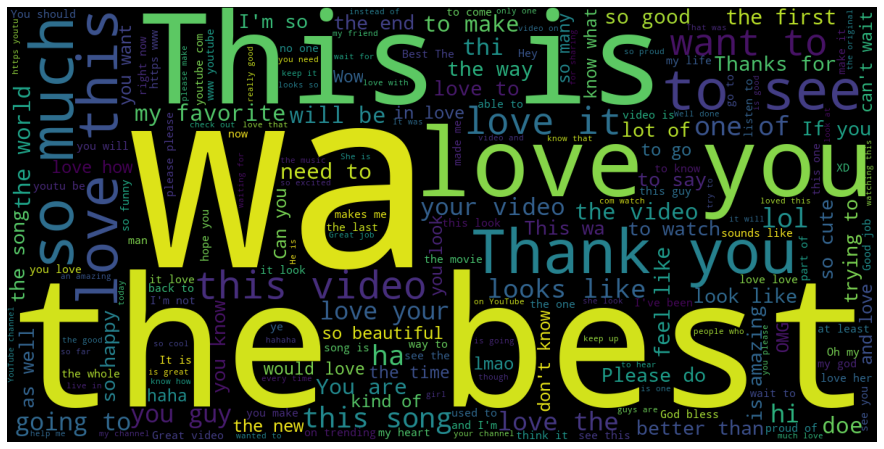

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

k=(' '.join(df_most_positive['comment_text']))
wordcloud=WordCloud(width=1200,height=600).generate(k)
plt.figure(figsize=(18,8))
plt.imshow(wordcloud)
plt.axis('off')

**Displaying the negative comments with compound score in ascending order(since most negative comments have lowest compound score)**

In [21]:
df_most_negative=df[df.comment_type==-1].sort_values(by='compound',ascending=True)

In [22]:
df_most_negative.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
84010,sgBGvgxuXvQ,PLEASE DO MACARONS!!!!! 😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬...,0,0,0.001,0.705,0.294,-1.0,-1
620175,XIQW-1JQDMA,Is tarzan elsa and annas brother please do a t...,0,0,0.002,0.747,0.251,-1.0,-1
103415,sgBGvgxuXvQ,PLEASE DO MACARONS!!!!! 😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬...,0,0,0.001,0.705,0.294,-1.0,-1
356050,Wp21hAL1mOU,I don't have HOLO😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢...,0,0,0.002,0.650,0.348,-1.0,-1
196,cLdxuaxaQwc,nigger nigger nigger nigger nigger nigger nigg...,0,0,0.000,1.000,0.000,-1.0,-1


In [23]:
df_most_negative.tail()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
507061,CrwmpuwLBiI,I really liked the trailer. I do have worries ...,0,0,0.093,0.093,0.814,-0.0009,-1
201025,RlduVwzqK2o,I would really love to know how Tracee keeps h...,0,0,0.147,0.097,0.756,-0.0009,-1
521108,Q0CbN8sfihY,Doesn't look as good as Phantom Menace or Atta...,1,0,0.162,0.247,0.591,-0.0008,-1
18065,l864IBj7cgw,"Never done axe throwing, but I doubt the googl...",0,0,0.182,0.182,0.637,-0.0005,-1
402209,6v3BWoddSgk,What a cuck another programmed simp yes female...,0,0,0.102,0.102,0.795,-0.0005,-1


# Now displaying the word-cloud to display the most used words in the negative type comments

(-0.5, 1199.5, 599.5, -0.5)

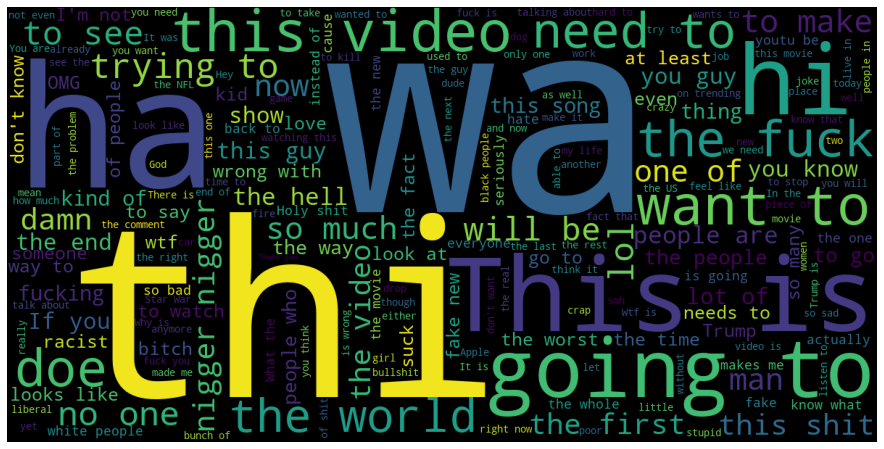

In [24]:
k=(' '.join(df_most_negative['comment_text']))
wordcloud=WordCloud(width=1200,height=600).generate(k)
plt.figure(figsize=(18,8))
plt.imshow(wordcloud)
plt.axis('off')

# Counting the no of comments of each types

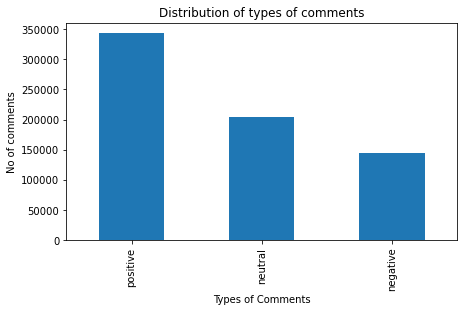

In [25]:
df['comment_type'].replace({1:'positive',0:'neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title("Distribution of types of comments");
plt.xlabel("Types of Comments");
plt.ylabel("No of comments");

# Now creating a dataset grouped by video_id's

In [29]:
vid_id=[]
pos_comm=[]
neg_comm=[]
neu_comm=[]
for i in set(df.video_id):
    vid_id.append(i)
    try:    
        pos_comm.append(df[df.video_id==i].comment_type.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(df[df.video_id==i].comment_type.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neu_comm.append(df[df.video_id==i].comment_type.value_counts()[0])
    except:
        neu_comm.append(0)

In [30]:
df_unique = pd.DataFrame(vid_id)
df_unique.columns=['vid_id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neu_comm'] = neu_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neu_comm']
df_unique.head(6)

,vid_id,pos_comm,neg_comm,neu_comm,total_comments
0,EWeJ7OM3mo4,206,71,123,400
1,8hAdOYDoo4c,242,59,99,400
2,YaTxVflKDQw,136,147,117,400
3,2iObySa91b0,202,184,113,499
4,GjtYtBGrP6Y,107,35,58,200
5,C1wa2OyP_so,65,37,98,200


# Saving this dataframe

In [31]:
df_unique.to_csv('unique.csv',header=False,)